In [1]:
from google.colab import files
files.upload()

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 340M/346M [00:02<00:00, 202MB/s]
100% 346M/346M [00:02<00:00, 178MB/s]


In [4]:

from zipfile import ZipFile
file_name='/content/intel-image-classification.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [6]:
### for Kaggle
trainpath = '/content/seg_train/'
testpath = '/content/seg_test/'
predpath = '/content/seg_pred/'

In [7]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2382 in folder street
For training data , found 2191 in folder buildings
For training data , found 2274 in folder sea
For training data , found 2512 in folder mountain
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier


In [8]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 501 in folder street
For testing data , found 437 in folder buildings
For testing data , found 510 in folder sea
For testing data , found 525 in folder mountain
For testing data , found 474 in folder forest
For testing data , found 553 in folder glacier


In [9]:
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


In [10]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [11]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

In [12]:
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(72, 150, 3)        1
(110, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [13]:
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(100, 150, 3)       1
(124, 150, 3)       1
(133, 150, 3)       1
(139, 150, 3)       1
(112, 150, 3)       1
(129, 150, 3)       1
(374, 500, 3)       1
(144, 150, 3)       1
(108, 150, 3)       1
(126, 150, 3)       1
(143, 150, 3)       1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [14]:
s = 100
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


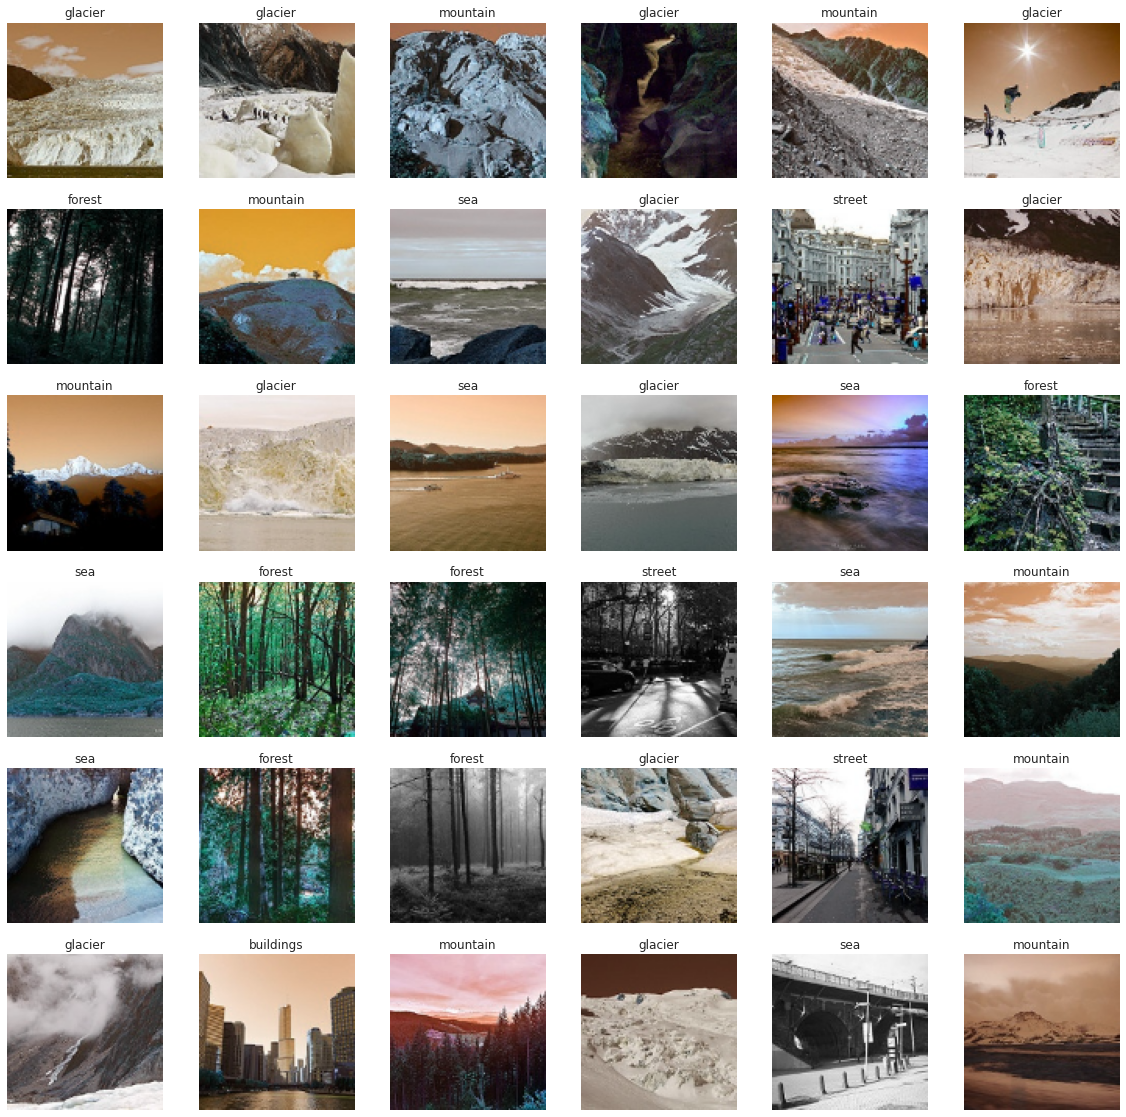

In [15]:

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [16]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


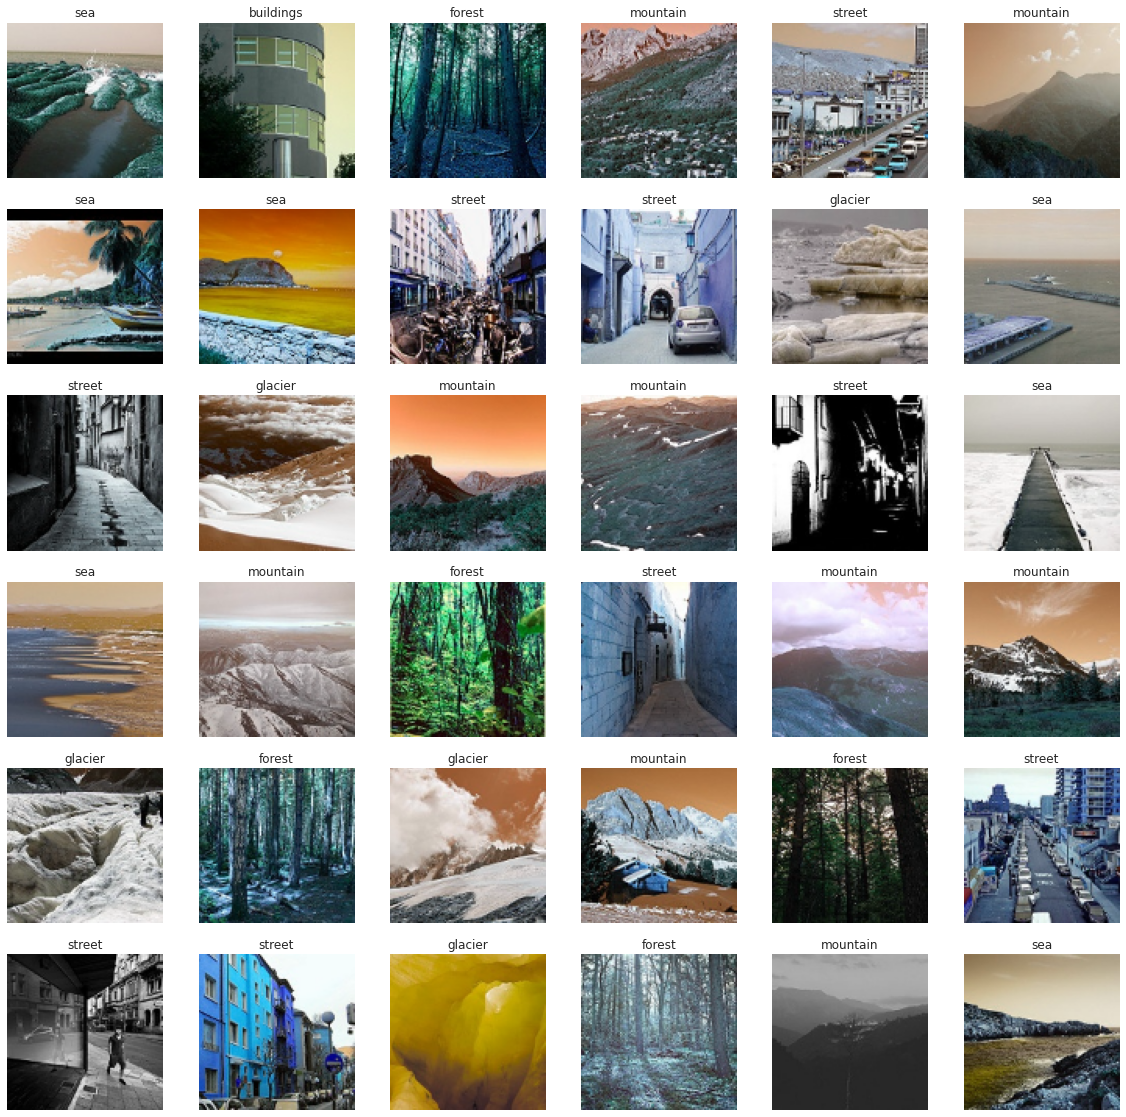

In [17]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [18]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))

print(f'we have {len(X_pred)} items in X_pred')

we have 7301 items in X_pred


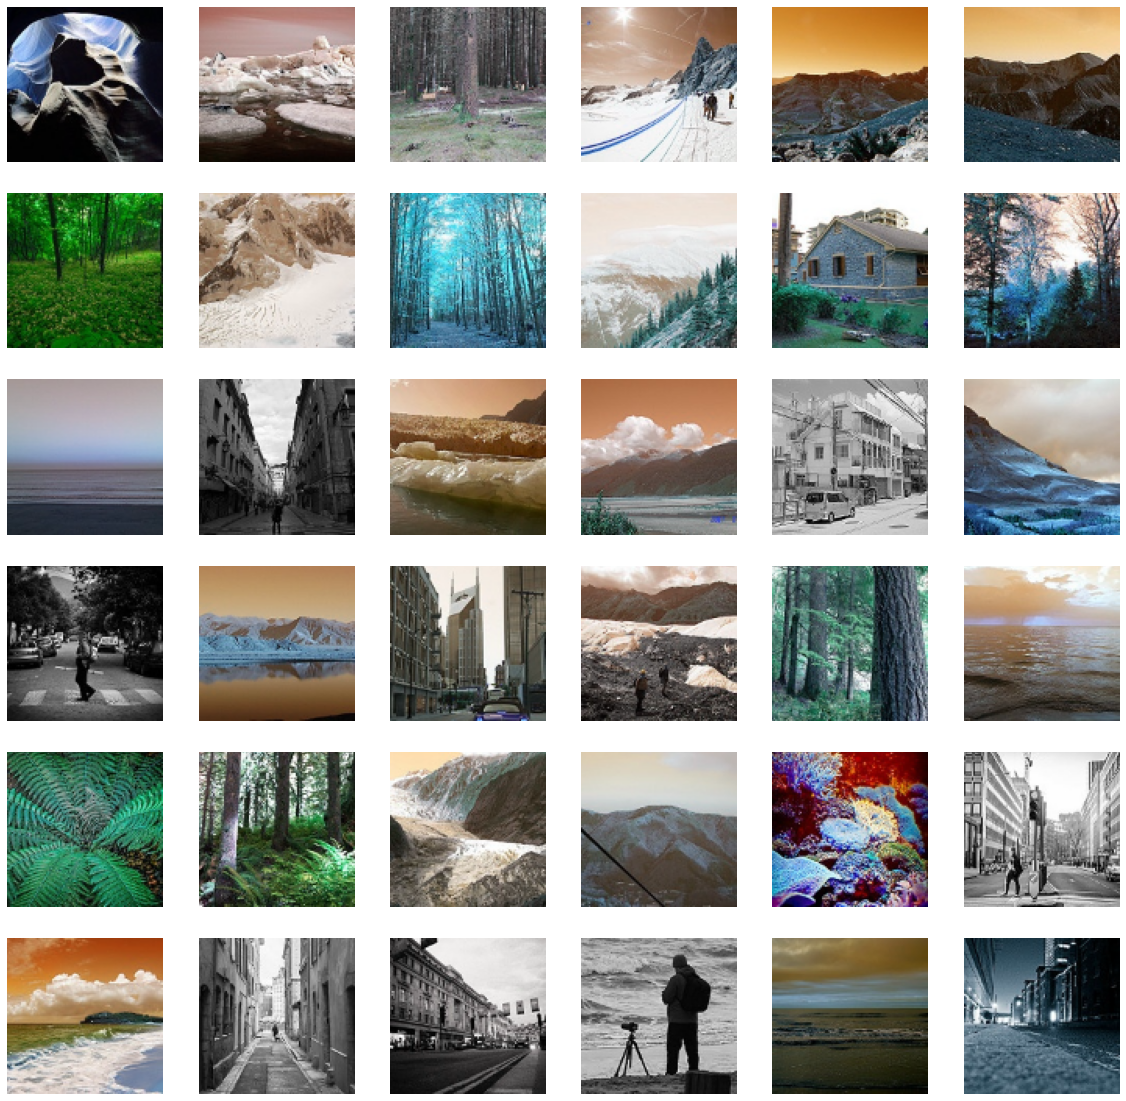

In [19]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [21]:
print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


In [22]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

In [23]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [24]:

print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None,

In [25]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/50
220/220 [==============================] - 39s 177ms/step - loss: 1.5693 - accuracy: 0.4013
Epoch 2/50
220/220 [==============================] - 40s 181ms/step - loss: 1.1435 - accuracy: 0.5377
Epoch 3/50
220/220 [==============================] - 41s 188ms/step - loss: 1.0054 - accuracy: 0.6131
Epoch 4/50
220/220 [==============================] - 41s 186ms/step - loss: 0.8880 - accuracy: 0.6739
Epoch 5/50
220/220 [==============================] - 41s 187ms/step - loss: 0.8158 - accuracy: 0.7163
Epoch 6/50
220/220 [==============================] - 41s 186ms/step - loss: 0.7517 - accuracy: 0.7417
Epoch 7/50
220/220 [==============================] - 41s 185ms/step - loss: 0.6635 - accuracy: 0.7790
Epoch 8/50
220/220 [==============================] - 41s 185ms/step - loss: 0.6090 - accuracy: 0.7980
Epoch 9/50
220/220 [==============================] - 41s 185ms/step - loss: 0.5924 - accuracy: 0.8043
Epoch 10/50
220/220 [==============================] - 41s 185ms/step - l

In [26]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

94/94 [==============================] - 3s 30ms/step - loss: 1.1264 - accuracy: 0.8277


In [27]:
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

Test Loss is 1.1264094114303589
Test Accuracy is 0.8276666402816772


In [28]:
y_pred = KerasModel.predict(X_test)

In [29]:
y_result = KerasModel.predict(X_pred_array)


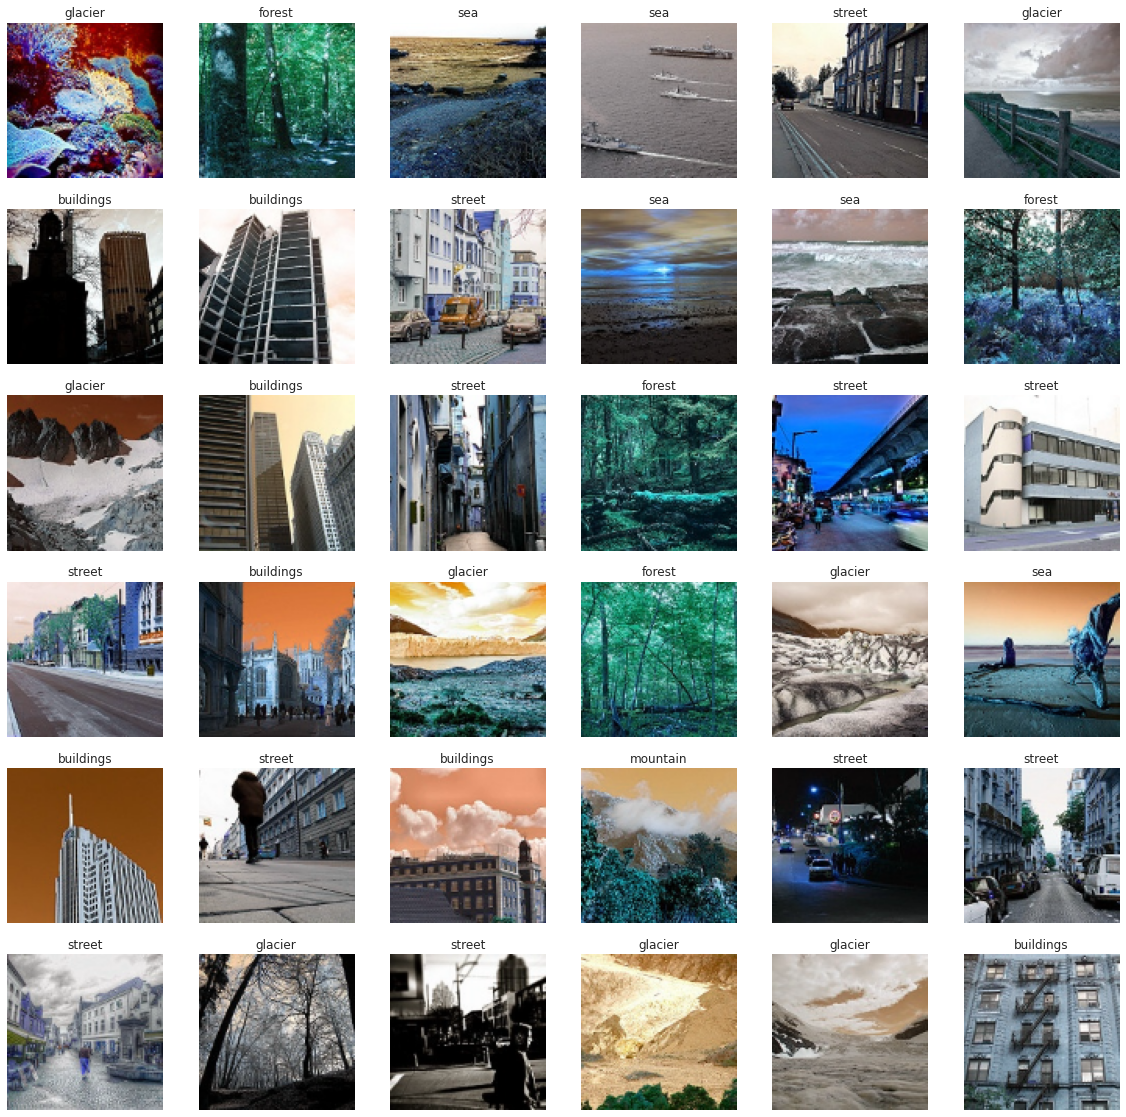

In [30]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))